# Intro to SciKit-Learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

# Review: `sns.load_dataset()`

In [3]:
sns.load_dataset('iris').head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


`sklearn.datasets`
https://scikit-learn.org/0.16/datasets/index.html

In [7]:
from sklearn.datasets import load_iris

raw = load_iris()
raw.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
df = pd.DataFrame(
    data = raw['data'],
    columns = raw['feature_names']
)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = raw['target']

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Review: `Linear Regression`

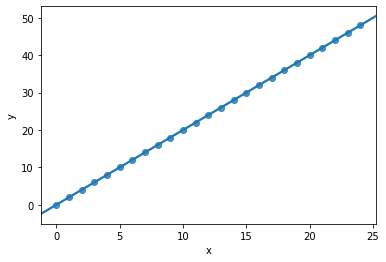

In [10]:
n = 25
df = pd.DataFrame({
    'x': range(n),
    'y': [(x * 2) for x in range(n)]
})

sns.regplot(x = 'x', y = 'y', data = df)

In [11]:
from sklearn.linear_model import LinearRegression

features = df[['x']] # features
target = df['y'] #target

In [12]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    test_size = .2,
    random_state = 42
)

features_train.shape[0]

20

In [13]:
features_train.head()

,x
9,9
13,13
1,1
22,22
5,5


In [15]:
target_train.head()

9     18
13    26
1      2
22    44
5     10
Name: y, dtype: int64

In [16]:
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
intercept = model.intercept_ # y-intercept
intercept

-1.0658141036401503e-14

In [18]:
x_slope = model.coef_[0]
x_slope

2.000000000000001

# Review: R-squared
- How well the regression line fits the data
- 0 to 1
- Higher is (generally) better

In [19]:
model.score(features_test, target_test)

1.0

# Ordinary Least Squares with `statsmodels`
- Same formula as LinearRegression
- If Prob(F-statistic) is less than the alpha (.05), then your model predicts the target variable better than the mean of the target variable (Null hypothesis: the fit of the intercept-only model and your model are equal)
- Calculates confidence interval for each feature's coefficient (slope)
- Calculates p-value for each coefficient

In [21]:
import statsmodels.api as sm
sm.OLS(target, features).fit().summary()

#prob is 0 , reject the null hyp
#[0.025	0.975] confidence intervals

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.262e+32
Date:                Tue, 17 Dec 2019   Prob (F-statistic):                        0.00
Time:                        20:17:43   Log-Likelihood:                          783.29
No. Observations:                  25   AIC:                                     -1565.
Df Residuals:                      24   BIC:                                     -1563.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.0000   8.72e-17   2.29e+16      0.000       2.000       2.000
==============================================================================
Omnibus:                        3.441   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                1.813
Skew:                           0.542   Prob(JB):                        0.404
Kurtosis:                       3.752   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Intercept

But what happens if we change the formula to **y = 2x + 10**

In [22]:
target2 = target + 10
target2.head()

0    10
1    12
2    14
3    16
4    18
Name: y, dtype: int64

In [23]:
sm.OLS(target2, features).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              1210.
Date:                Tue, 17 Dec 2019   Prob (F-statistic):                    4.77e-22
Time:                        20:29:07   Log-Likelihood:                         -76.452
No. Observations:                  25   AIC:                                      154.9
Df Residuals:                      24   BIC:                                      156.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              2.6122      0.075     34.784      0.000       2.457       2.767
==============================================================================
Omnibus:                        4.100   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                1.510
Skew:                          -0.000   Prob(JB):                        0.470
Kurtosis:                       1.796   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

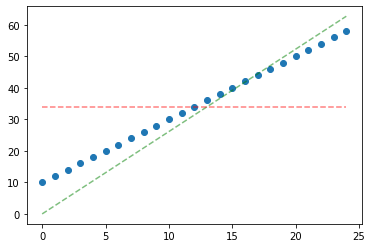

In [25]:
plt.scatter(features, target2)

# Regression line
plt.plot(
    range(n), #x values
    [(x * 2.6122) for x in range(n)], # y values
    color = 'green',
    ls = '--',
    alpha = 0.5
)

# mean of y2
plt.plot(
    range(n), #x values
    [target2.mean() for _ in range(n)], # y values
    color = 'red',
    ls = '--',
    alpha = 0.5
)

We must tell statsmodel to find the intercept

In [26]:
sm.OLS(target2,
      sm.add_constant(features.values) #disabled by default!
      ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.581e+32
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:38:33   Log-Likelihood:                 804.97
No. Observations:                  25   AIC:                            -1606.
Df Residuals:                      23   BIC:                            -1603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000   1.02e-15   9.83e+15      0.000      10.000      10.000
x1             2.0000   7.26e-17   2.75e+16      0.000       2.000       2.000
==============================================================================
Omnibus:                        8.397   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                9.599
Skew:                           0.558   Prob(JB):                      0.00823
Kurtosis:                       5.823   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multivariate Regression with OLS

In [27]:
df['x2'] = np.random.rand(n)
df['x3'] = np.random.rand(n)
df = df[['x', 'x2', 'x3', 'y']] #change the order of the columns

In [28]:
multi_features = df[['x', 'x2', 'x3']]

sm.OLS(
    target2,
    sm.add_constant(multi_features.values)
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.870e+31
Date:                Tue, 17 Dec 2019   Prob (F-statistic):          1.25e-319
Time:                        20:41:53   Log-Likelihood:                 773.56
No. Observations:                  25   AIC:                            -1539.
Df Residuals:                      21   BIC:                            -1534.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000   6.52e-15   1.53e+15      0.000      10.000      10.000
x1             2.0000   2.76e-16   7.24e+15      0.000       2.000       2.000
x2          1.332e-14   7.14e-15      1.867      0.076   -1.52e-15    2.82e-14
x3          5.329e-15   6.64e-15      0.802      0.431   -8.48e-15    1.91e-14
==============================================================================
Omnibus:                        6.292   Durbin-Watson:                   0.598
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                1.863
Skew:                           0.110   Prob(JB):                        0.394
Kurtosis:                       1.681   Cond. No.                         68.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Compare to SciKit:

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    multi_features,
    target2,
    test_size = .2,
    random_state = 42
)
X_train.head()

,x,x2,x3
9,9,0.708073,0.965632
13,13,0.212339,0.684233
1,1,0.950714,0.199674
22,22,0.292145,0.520068
5,5,0.155995,0.607545


In [30]:
y_train.head()

9     28
13    36
1     12
22    54
5     20
Name: y, dtype: int64

In [32]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print(model2.coef_)
print(model2.intercept_ )

[ 2.00000000e+00 -4.59532381e-15 -7.55714054e-15]
10.000000000000018


In [37]:
model2.score(X_test, y_test)

1.0

# `r2_score`

In [36]:
predictions = model2.predict(X_test)
predictions

array([26., 42., 10., 56., 32.])

In [38]:
from sklearn.metrics import r2_score

r2_score(y_test, predictions)

1.0

# Feature ranking with recursive feature elimination.



Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [40]:
from sklearn.feature_selection import RFE

selector = RFE(
    model2, # estimator
    1 #number of features to select: if None, half are selected
).fit(X_train, y_train)
selector

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=0)

In [41]:
selector.ranking_

array([1, 3, 2])

In [42]:
selector.support_

array([ True, False, False])